# Making loss function

## Problem description

The final goal is to forecast the turnover of household appliances, which involves determining the appropriate quantity of each product to bring to a specific point of sale. Deliveries are made every three months.

It's crucial to strike a balance between stocking enough inventory to satisfy demand and avoiding excess inventory that could be difficult to manage. If we don't stock enough inventory, we risk missing out on potential profits, as customers will be unable to purchase the equipment they need. Conversely, if we stock too much, we may end up with an overflowing warehouse, which could create logistical challenges and limit our ability to import newer models. 

Therefore, we must determine the optimal inventory level by developing a loss function that considers the cost of missed profits and the cost of excess inventory, among other factors. This approach will help us to find the right balance between meeting demand and minimizing inventory costs.

The aim of this prioject is **to come up with a loss function** that would be adequate for a given business problem.

## Loss function

The Root Mean Squared Logarithmic Error (RMSLE) would be the most appropriate metric to evaluate the performance of the forecasting model.

* RMSLE is a commonly used metric for evaluating the accuracy of demand forecasting models. It is particularly useful when the demand data contains a wide range of values, including both small and large values. 
* The RMSLE penalizes the model more for underestimating large values than for underestimating small values, which is important in forecasting scenarios where there may be a few extreme values that have a significant impact on the overall performance of the model. It's acceptable if the model cannot accurately predict minor demand as it will not result in significant profit loss if we underestimate or import an excess amount of goods if we overestimate. However, if the model fails to predict substantial demand, it can lead to significant profit loss or logistical issues.
* The Huber-loss and LINEX loss functions are also useful metrics for evaluating forecasting models, but they require additional information such as cost functions or risk preferences. We have only true and predicted values.

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def turnover_error(y_true: np.array, y_pred: np.array) -> float:
    """
    Calculate Root Mean Squared Logarithmic Error between two numpy arrays

    We use the log1p function instead of the log function to avoid errors 
    when taking the logarithm of values close to zero. 
    The log1p function returns the natural logarithm of 1 plus the input value,
    which is mathematically equivalent to log(1 + x) but more numerically stable.

    """
    assert len(y_true) == len(
        y_pred), "The length of y_true and y_pred should be the same."
    assert (y_true >= 0).all() and (
        y_pred >= 0).all(), "Both y_true and y_pred should be non-negative."

    # Compute the RMSLE
    error = np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2)))

    return error

## Testing

In [63]:
# Let`s check this: 
# The RMSLE penalizes the model more for underestimating large values 
# than for underestimating small values
underestimating_model_errs = []
overestimating_model_errs = []
for _ in range(30):
    y_true = np.random.randint(100, 500, size=100)
    y_pred = np.random.randint(100, 500, size=100)
    underestimating_model_errs.append(turnover_error(y_true, y_pred-50))
    overestimating_model_errs.append(turnover_error(y_true, y_pred+50))

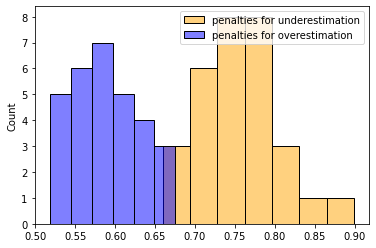

In [65]:
sns.histplot(underestimating_model_errs,
             color='orange',
             alpha=0.5,
             label='penalties for underestimation')
sns.histplot(overestimating_model_errs,
             color='blue',
             alpha=0.5,
             label='penalties for overestimation')
plt.legend()
plt.show()

The RMSLE penalizes the model more for underestimating than for overestimation